In [17]:
import numpy as np 
import pandas as pd 
training_data=pd.read_excel(r'C:\Users\hemanth\Downloads\ML DATA SET\training (2).xlsx')


training_data


,input,output
0,px2+px+k=0 \n7((-5)2-5)+k=0\n 7(25-5)+k=0\n140...,0.0
1,X= - b ± √b2 – 4ac/2a\t\nx= - 3 ± √(3)2 -4(4)...,0.0
2,x2 + kx + 64=0 \nx - 8x +k =0 \nb - 4ac>= 0\n ...,0.0
3,"""X=- b ± squareroot(b^2-4ac) /2a\n X= - (-2√2)...",0.0
4,X= -(-2√2)±√((2√2)^2+4(√(3 ))(2√3) )\n\n=2√2±√...,0.0
...,...,...
1122,(7P+ 2)²-4(2P+1) (7P-3)=0\n(a+b)² a²+b²+2ab \n...,5.0
1123,(7p+2)²-4(2p+1) (7p-3) 0\n(a+b)² = a²+b²+2ab\n...,5.0
1124,(7P+2)²-4 (2P+1) (7P-3)\n= 49P²+4+23P - 4 (14P...,5.0
1125,(7p+2)² - 4(2p + 1)(7p - 3) = 0\n49p²+ 4 + 28p...,5.0


In [18]:
testing_data=pd.read_excel(r'C:\Users\hemanth\Downloads\ML DATA SET\testing (2).xlsx')

testing_data

,Equation,output
0,px2+px+k=0 \n7((-5)2-5)+k=0\n 7(25-5)+k=0\n140...,0.000
1,3) 2x2+Px 15 to 2(-5)2x² + Px -15 = 0·\n2 (-5)...,2.500
2,2x2+px-15=0 α=-5 αβ==-15/2 α+β=-b/a β=3/2 -5+3...,4.500
3,Given \n2x2+px-15=0\n-5 root -> x=-5 \n2(-5)2+...,5.000
4,d=192km t=2hrs u0= x\nut = x+16\ns=d/t= 192/2=...,1.250
...,...,...
65,Taking usual time as t and spud as S. \t\nt = ...,4.750
66,9x2-3ax + 1=0 \nMethod : ax -b +c = 0\nb2-4ac,1.000
67,9x2-3ax + 1=0 \nMethod : ax -b +c = 0\nb2-4ac\...,2.000
68,Given equation is Comparing with \nax2+ bx + c...,3.750


In [10]:
pip install transformers

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install -U sentence-transformers

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [19]:
from sentence_transformers import SentenceTransformer
model=SentenceTransformer('sentence-transformers/sentence-t5-base')
testing_data['EmbeddingsLM']=testing_data['Equation'].apply(lambda x:model.encode(x))
t5_test=pd.DataFrame(testing_data['EmbeddingsLM'].tolist(),index=testing_data.index).add_prefix('embed_')

In [20]:
from sentence_transformers import SentenceTransformer
model=SentenceTransformer('sentence-transformers/sentence-t5-base')
training_data['EmbeddingsLM']=training_data['input'].apply(lambda x:model.encode(str(x)))
t5_train=pd.DataFrame(training_data['EmbeddingsLM'].tolist(),index=training_data.index).add_prefix('embed_')

In [32]:
classes = df.groupby('output')['output'].mean()
 

display(classes)

output
0.000000    0.000000
0.250000    0.250000
0.375000    0.375000
0.500000    0.500000
0.750000    0.750000
1.000000    1.000000
1.250000    1.250000
1.261364    1.261364
1.750000    1.750000
1.875000    1.875000
2.000000    2.000000
2.375000    2.375000
2.500000    2.500000
2.625000    2.625000
2.660714    2.660714
2.750000    2.750000
3.000000    3.000000
3.125000    3.125000
3.250000    3.250000
3.458333    3.458333
3.500000    3.500000
3.625000    3.625000
3.750000    3.750000
3.937500    3.937500
4.000000    4.000000
4.250000    4.250000
4.375000    4.375000
4.500000    4.500000
4.750000    4.750000
4.875000    4.875000
5.000000    5.000000
Name: output, dtype: float64

In [33]:
classes_sd = df.groupby('output')['output'].std()
 

display(classes_sd)

output
0.000000    0.0
0.250000    0.0
0.375000    NaN
0.500000    NaN
0.750000    NaN
1.000000    0.0
1.250000    0.0
1.261364    NaN
1.750000    0.0
1.875000    0.0
2.000000    0.0
2.375000    NaN
2.500000    0.0
2.625000    NaN
2.660714    NaN
2.750000    0.0
3.000000    0.0
3.125000    NaN
3.250000    0.0
3.458333    NaN
3.500000    NaN
3.625000    NaN
3.750000    0.0
3.937500    NaN
4.000000    0.0
4.250000    0.0
4.375000    NaN
4.500000    NaN
4.750000    0.0
4.875000    0.0
5.000000    0.0
Name: output, dtype: float64

In [23]:
from sklearn.metrics import pairwise_distances
class_2 = t5_train[training_data['output'] == 2] 
class_3 = t5_train[training_data['output'] == 3] 

class_2_centroid = np.mean(class_2, axis=0)
class_3_centroid = np.mean(class_3, axis=0)


intra_class_spread_2 = np.mean(pairwise_distances(class_2, [class_2_centroid]))
intra_class_spread_3 = np.mean(pairwise_distances(class_3, [class_3_centroid]))

inter_class_distance = np.linalg.norm(class_2_centroid - class_3_centroid)

print(f"Intra-Class Spread for Class 2: {intra_class_spread_2}")
print(f"Intra-Class Spread for Class 3: {intra_class_spread_3}")
print(f"Inter-Class Distance: {inter_class_distance}")

Intra-Class Spread for Class 2: 0.4001496732234955
Intra-Class Spread for Class 3: 0.3766618072986603
Inter-Class Distance: 0.11180766671895981


In [24]:
class_2_centroid = np.mean(class_2, axis=0)
class_3_centroid = np.mean(class_3, axis=0)

print("Centroid for Class 2:")
print(class_2_centroid)

print("Centroid for Class 3:")
print(class_3_centroid)

Centroid for Class 2:
embed_0     -0.031106
embed_1     -0.023400
embed_2      0.029723
embed_3      0.025665
embed_4     -0.012012
               ...   
embed_763    0.045582
embed_764    0.013111
embed_765    0.005711
embed_766   -0.015524
embed_767   -0.020441
Length: 768, dtype: float32
Centroid for Class 3:
embed_0     -0.037951
embed_1     -0.028591
embed_2      0.032577
embed_3      0.025683
embed_4     -0.017560
               ...   
embed_763    0.050057
embed_764    0.008738
embed_765   -0.001315
embed_766   -0.015059
embed_767   -0.018862
Length: 768, dtype: float32


In [25]:
std_dev_class_2 = np.std(class_2, axis=0)
std_dev_class_3 = np.std(class_3, axis=0)

print("Standard Deviation for Class 2:")
print(std_dev_class_2)

print("Standard Deviation for Class 3:")
print(std_dev_class_3)

Standard Deviation for Class 2:
embed_0      0.014434
embed_1      0.014191
embed_2      0.016214
embed_3      0.015403
embed_4      0.015401
               ...   
embed_763    0.015673
embed_764    0.013112
embed_765    0.014319
embed_766    0.018266
embed_767    0.016980
Length: 768, dtype: float32
Standard Deviation for Class 3:
embed_0      0.015613
embed_1      0.016008
embed_2      0.012478
embed_3      0.013279
embed_4      0.014854
               ...   
embed_763    0.016168
embed_764    0.012550
embed_765    0.015888
embed_766    0.016322
embed_767    0.012241
Length: 768, dtype: float32


In [27]:
class_2_centroid = np.mean(class_2, axis=0)
class_3_centroid = np.mean(class_3, axis=0)

distance_between_two_classes = np.linalg.norm(class_2_centroid - class_3_centroid)

print("Distance between Class 2 and Class 3 mean vectors:")
print(distance_between_two_classes)


Distance between Class 2 and Class 3 mean vectors:
0.11180767


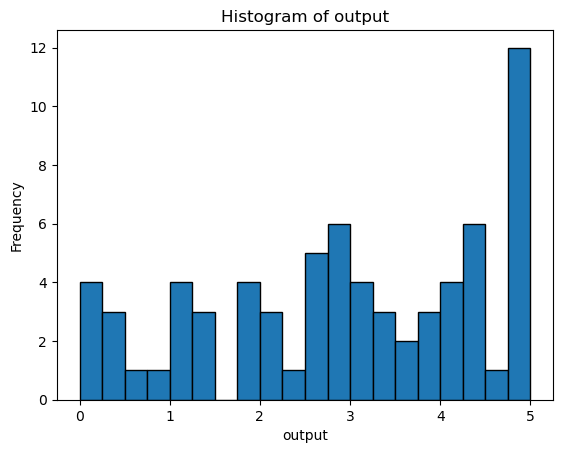

Mean of output: 2.8616844465058753
Variance of output: 2.402811788864269


In [28]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel(r'C:\Users\hemanth\Downloads\ML DATA SET\testing (2).xlsx')

selected_feature = 'output'


num_bins = 20  
plt.hist(df[selected_feature], bins=num_bins, edgecolor='k')
plt.xlabel(selected_feature)
plt.ylabel('Frequency')
plt.title(f'Histogram of {selected_feature}')
plt.show()

feature_mean = df[selected_feature].mean()
feature_variance = df[selected_feature].var()

print(f"Mean of {selected_feature}: {feature_mean}")
print(f"Variance of {selected_feature}: {feature_variance}")


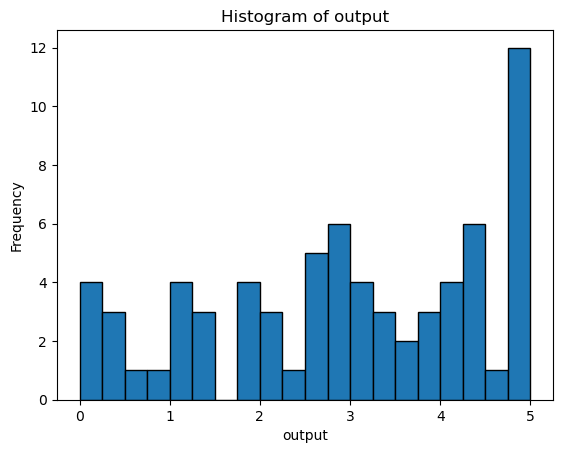

Mean of output: 2.8616844465058753
Variance of output: 2.402811788864269


In [29]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel(r'C:\Users\hemanth\Downloads\ML DATA SET\testing (2).xlsx')

selected_feature = 'output'

num_bins = 20  
plt.hist(df[selected_feature], bins=num_bins, edgecolor='k')
plt.xlabel(selected_feature)
plt.ylabel('Frequency')
plt.title(f'Histogram of {selected_feature}')
plt.show()

feature_mean = df[selected_feature].mean()
feature_variance = df[selected_feature].var()

print(f"Mean of {selected_feature}: {feature_mean}")
print(f"Variance of {selected_feature}: {feature_variance}")

C:\ProgramData\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


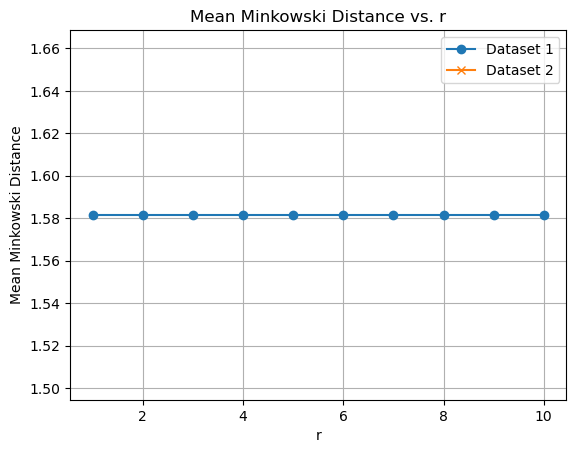

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df1 = pd.read_excel(r'C:\Users\hemanth\Downloads\ML DATA SET\testing (2).xlsx')
 
df2 = pd.read_excel(r'C:\Users\hemanth\Downloads\ML DATA SET\training (2).xlsx')

feature1 = df1['output'].values
feature2 = df2['output'].values

r_values = range(1, 11)

distances1 = []
distances2 = []

for r in r_values:
    minkowski_distances1 = []
    minkowski_distances2 = []
    
    for i in range(len(feature1)):
        for j in range(len(feature2)):
            distance = np.abs(feature1[i] - feature2[j])**r
            minkowski_distances1.append(distance**(1/r))
    
    mean_distance1 = np.mean(minkowski_distances1)
    mean_distance2 = np.mean(minkowski_distances2)
    
    distances1.append(mean_distance1)
    distances2.append(mean_distance2)

plt.plot(r_values, distances1, label='Dataset 1', marker='o', linestyle='-')
plt.plot(r_values, distances2, label='Dataset 2', marker='x', linestyle='-')
plt.xlabel('r')
plt.ylabel('Mean Minkowski Distance')
plt.title('Mean Minkowski Distance vs. r')
plt.legend()
plt.grid(True)
plt.show()

In [34]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(t5_train, )

ValueError: could not convert string to float: 'px2+px+k=0 \n7((-5)2-5)+k=0\n 7(25-5)+k=0\n140+k=0\nk=-140'